# Avacado Project

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
d = pd.read_csv('avacado.csv')

In [3]:
df = pd.DataFrame(d)

In [4]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   int64  
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   int64  
 13  region        1517 non-null   object 
dtypes: float64(9), int64(2), object(3)
memory usage: 166.0+ KB


14 columns : 1 target variable(Average Price)
    
Date is of incorrect datatype object 

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df.dtypes

Unnamed: 0               int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

Data type of Date is changed to datetime64

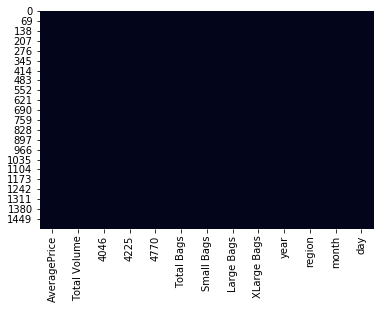

In [167]:
sns.heatmap(df.isnull(),cbar=False)

No null values in the dataset

In [9]:
df['month']  = df['Date'].dt.month


In [10]:
df['day'] = df['Date'].dt.day

In [11]:
df['year'].value_counts()

2015    1270
2016     247
Name: year, dtype: int64

In [13]:
df['year_new'] = df['Date'].dt.year

In [15]:
df['year_new'].value_counts()

2015    1270
2016     247
Name: year_new, dtype: int64

In [16]:
df.drop('year_new',axis=1,inplace=True)

Separated : month and day from the date column and dropped the Date column 

In [17]:
df.drop('Date',axis=1,inplace=True)

In [18]:
df.columns

Index(['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'month', 'day'],
      dtype='object')

In [19]:
numerical_features = [i for i in df if df[i].dtypes!='O']

In [20]:
numerical_features

['Unnamed: 0',
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'year',
 'month',
 'day']

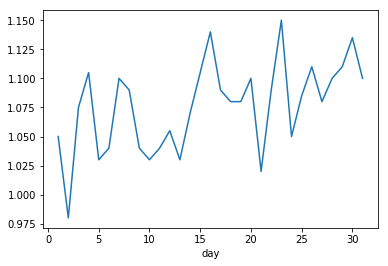

In [21]:
df.groupby('day')['AveragePrice'].median().plot()

No significant pattern is there between target variable and day:
    
Rather:
  
Least Avgprice is between day 1 to day 3

Max Avgprice is between day 20 to day 25

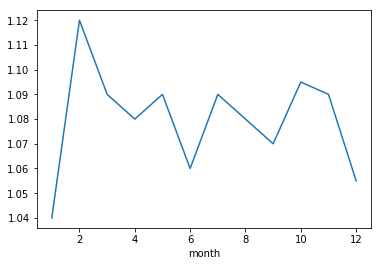

In [22]:
df.groupby('month')['AveragePrice'].median().plot()

In first and last month Avgprice is least

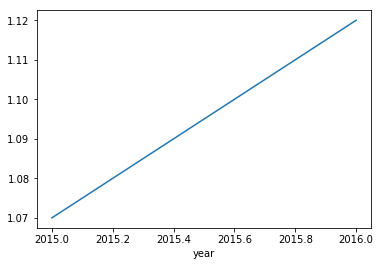

In [23]:
df.groupby('year')['AveragePrice'].median().plot()

In [25]:
categorical_features = [i for i in df if df[i].dtypes=='O']

In [26]:
categorical_features

['type', 'region']

Two categorical features in the dataset 

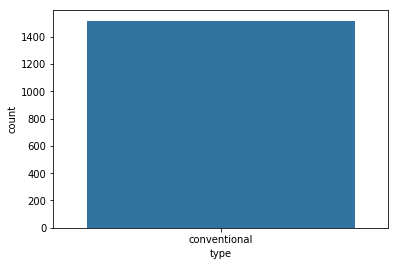

In [27]:
sns.countplot(df['type'])

One category in type (will not make any impact in predicting target)

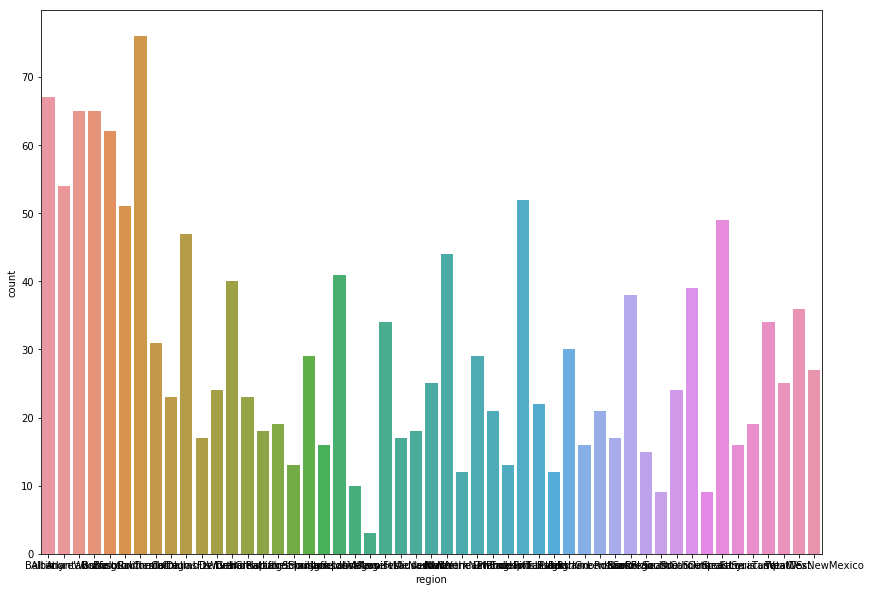

In [28]:
plt.figure(figsize=(14,10))
sns.countplot(df['region'])

In [29]:
print(df['region'].unique())

['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'Columbus'
 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewYork' 'Northeast' 'NorthernNewEngland'
 'Orlando' 'Philadelphia' 'PhoenixTucson' 'Pittsburgh' 'Plains' 'Portland'
 'RaleighGreensboro' 'RichmondNorfolk' 'Roanoke' 'SanDiego' 'SanFrancisco'
 'Seattle' 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis'
 'Syracuse' 'Tampa' 'TotalUS' 'West' 'WestTexNewMexico']


50 categories are there in  region feature below is the frequencies of each category:
    
Most frequent is : California (76)
    
Least frequent is : LosAngeles (3)

In [30]:
df['region'].value_counts()

California             76
Albany                 67
BaltimoreWashington    65
Boise                  65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Louisville             34
Tampa                  34
Charlotte              31
Portland               30
NorthernNewEngland     29
Houston                29
WestTexNewMexico       27
TotalUS                25
Nashville              25
Denver                 24
SouthCarolina          24
Chicago                23
GrandRapids            23
Pittsburgh             22
Orlando                21
RichmondNorfolk        21
Syracuse               19
HarrisburgScranton     19
Midsouth               18
GreatLakes             18
Roanoke                17
DallasFtWorth          17
MiamiFtLaude

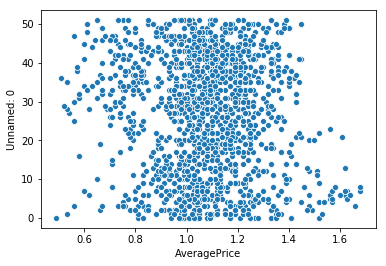

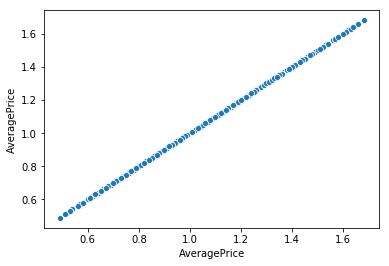

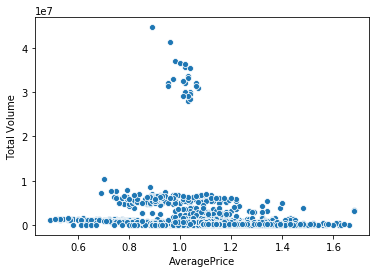

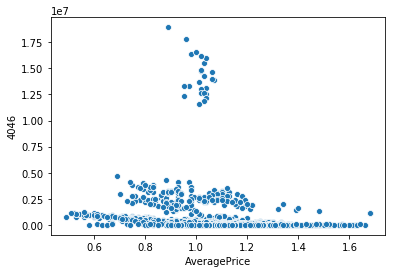

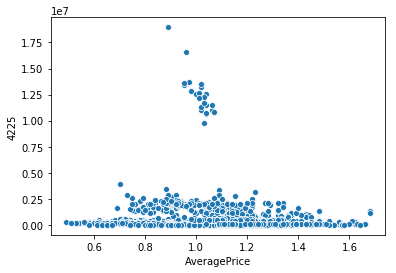

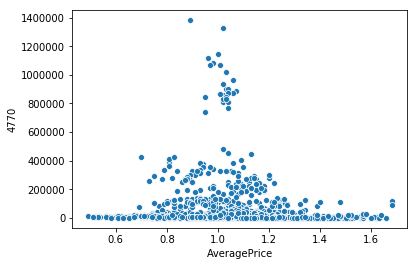

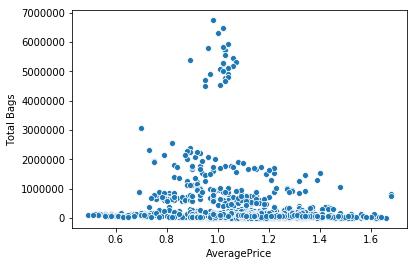

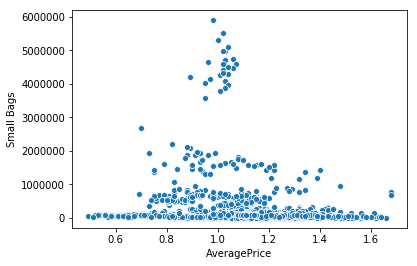

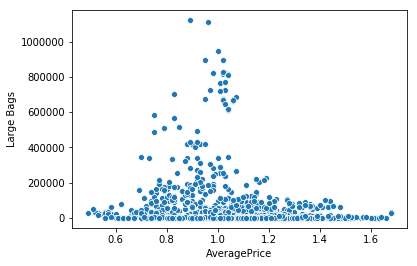

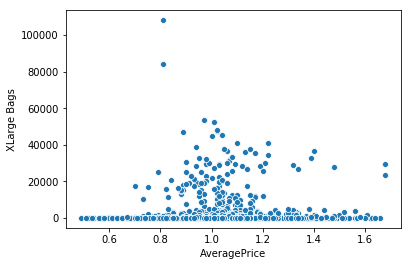

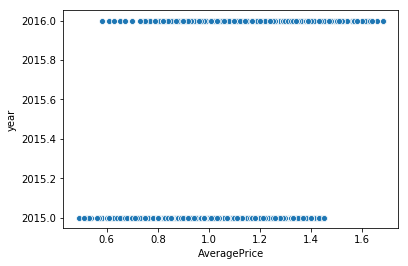

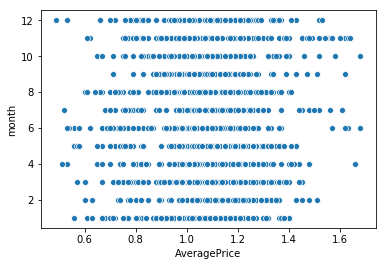

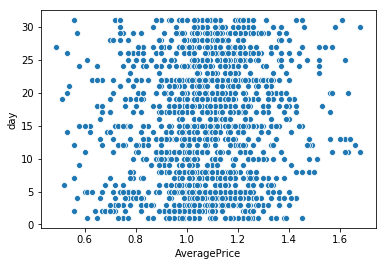

In [31]:
for i in numerical_features:
    sns.scatterplot(x='AveragePrice',y=i,data=df)
    plt.show()

Unnamed are the unique id (no relation with dependent variable)

Scatter plot indicates the presence of outliers in each column above the 75 percentile

In [32]:
df.drop('type',axis=1,inplace=True)

In [33]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [34]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany,11,29


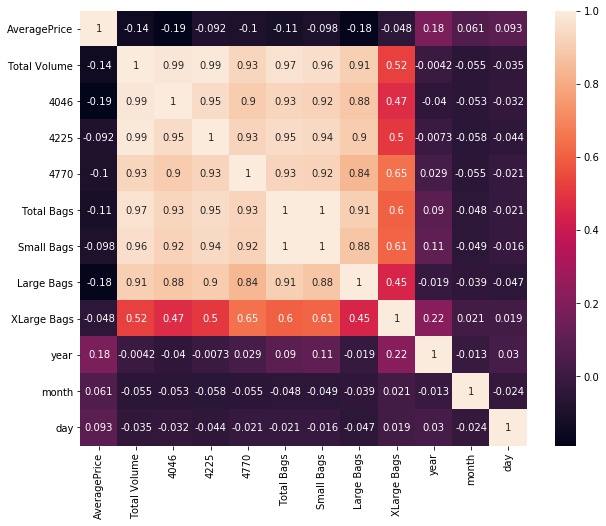

In [36]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

Least correlation with month

Max correlation with 4046

Total volume is strongly correlated with :

4046,4225,4770,total bags,small,bags

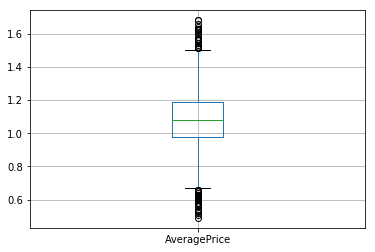

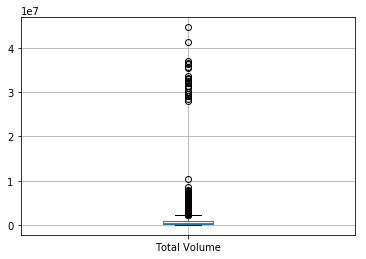

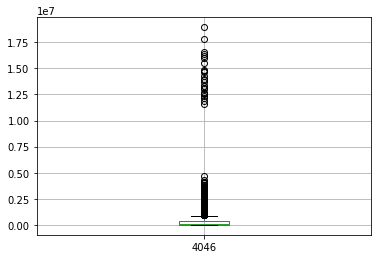

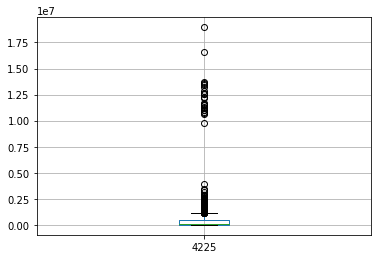

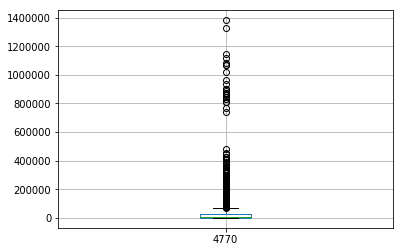

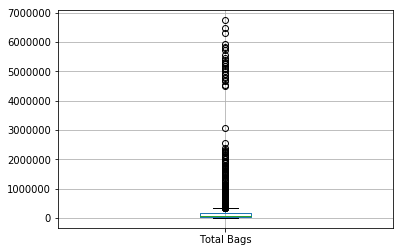

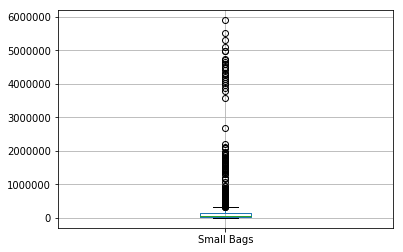

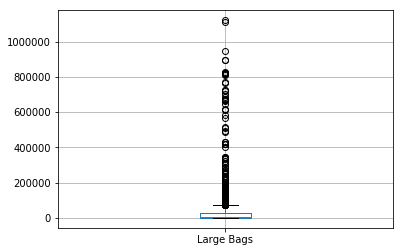

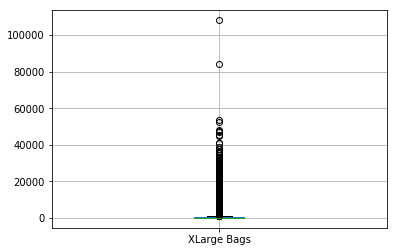

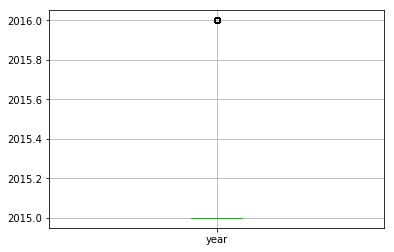

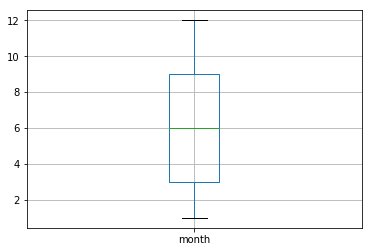

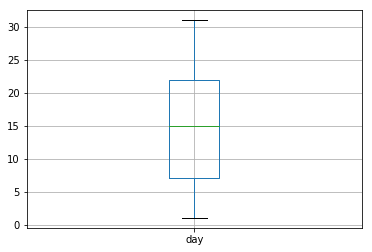

In [38]:
for i in numerical_features:
    if(i=='Unnamed: 0'):
        pass
    else:
        df.boxplot(i)
        plt.show()

Each feature has outliers at both sides

(above 75 percentile and below 25 percentile)

In [39]:
from scipy.stats import zscore

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
label_encoder = LabelEncoder()
df['region']= label_encoder.fit_transform(df['region'])

In [43]:
z_score = abs(zscore(df))

In [44]:
df_n = df[(z_score<3).all(axis=1)]

In [45]:
df.shape

(1517, 13)

In [46]:
df_n.shape

(1436, 13)

In [47]:
per_loss = (1517-1436)/1517*100

In [48]:
per_loss

5.339485827290705

Percentage loss after removing outliers is 5.33 % 



In [50]:
for i in numerical_features:
    if(i=='Unnamed: 0'):
        pass
    else:
        print(i,df_n[i].skew())

AveragePrice -0.18476983366162456
Total Volume 2.7040845406685885
4046 3.1207559580520443
4225 2.3674291453826304
4770 3.331190708044645
Total Bags 4.165747480832365
Small Bags 4.410267265487678
Large Bags 3.5180564321819676
XLarge Bags 5.118964968649566
year 2.0044390023339442
month 0.11189771330091906
day 0.04184908805619837


Columns are highly skewed

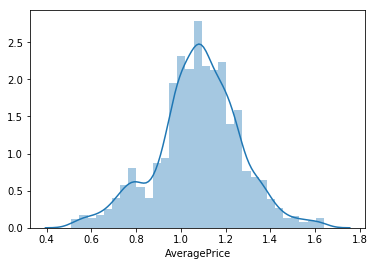

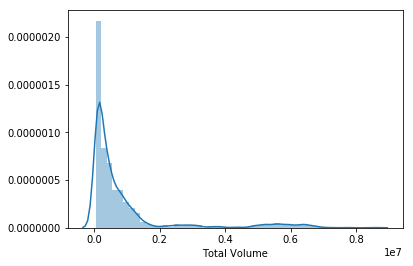

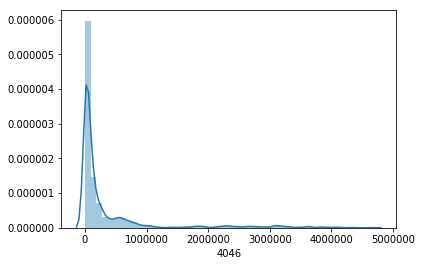

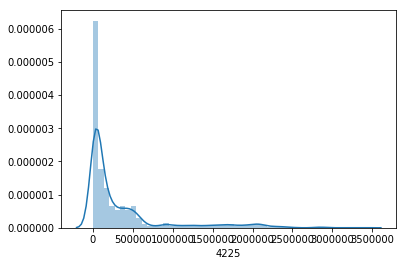

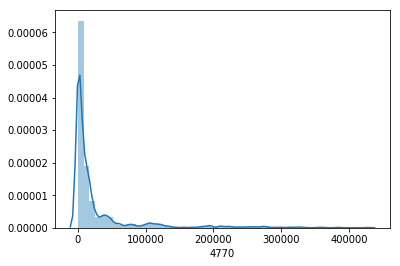

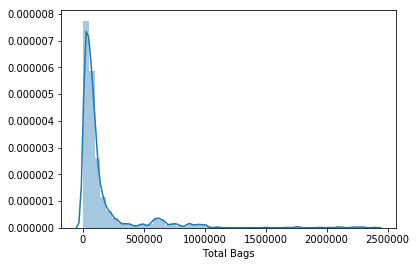

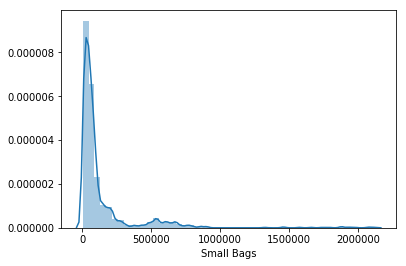

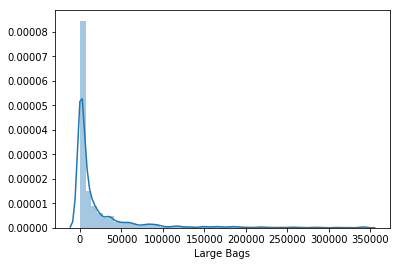

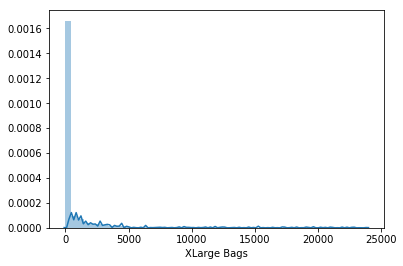

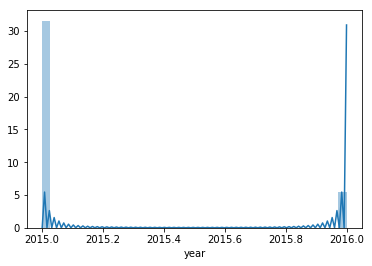

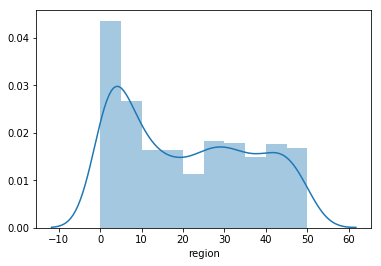

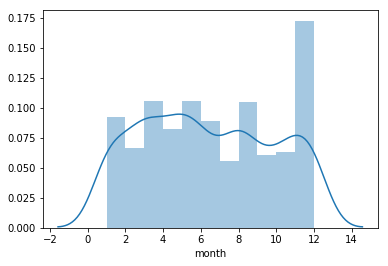

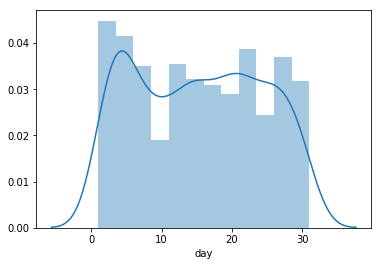

In [51]:
for feature in df_n.columns:
    sns.distplot(df_n[feature])
    plt.show()

In [59]:
df_n['Total Volume'] = np.cbrt(df_n['Total Volume'])

In [62]:
df_n['4046'] = np.cbrt(df_n['4046'])

In [66]:
df_n['4046'].skew()

0.23105222286260604

In [68]:
df_n['Total Volume'] = np.cbrt(df_n['Total Volume'])

In [69]:
df_n['Total Volume'].skew()

0.5595342192329469

In [72]:
df_n['4225'] = np.cbrt(df_n['4225'])

In [73]:
df_n['4225'].skew()

0.36960614610895365

In [74]:
df_n['4770'] = np.cbrt(df_n['4770'])

In [78]:
df_n['4770'].skew()

0.021208510856211803

In [79]:
df_n['Total Bags'] = np.cbrt(df_n['Total Bags'])

In [90]:
df_n['Small Bags'] = np.sqrt(df_n['Small Bags'])

In [100]:
df_n['Large Bags'] = np.sqrt(df_n['Large Bags'])

In [102]:
df_n['Large Bags'].skew()

-0.26800283678848547

In [104]:
df_n['XLarge Bags'].value_counts()

0.00        796
240.28        2
2.85          2
1.63          2
15.88         2
           ... 
18996.98      1
594.44        1
729.47        1
138.43        1
753.76        1
Name: XLarge Bags, Length: 633, dtype: int64

In [133]:
df_n['XLarge Bags'] = np.cbrt(df_n['XLarge Bags'])

In [136]:
df_n['XLarge Bags'].skew()

0.5528691426995678

Manually performed transformation to remove the skewness as :
    
The presence of  0 will lead to infinte values 

In [113]:
month_new = []

In [115]:
for i in df_n['month']:
    r = df_n['month'].max() - df_n['month'].min()
    minimum = df_n['month'].min()
    j = (i-minimum)/(r)
    month_new.append(j)
    

In [117]:
day_new = []
for i in df_n['day']:
    r = df_n['day'].max() - df_n['day'].min()
    minimum = df_n['day'].min()
    j = (i-minimum)/(r)
    day_new.append(j)
    

In [119]:
df_n['day_n'] = day_new

In [120]:
df_n['month_n'] = month_new

In [122]:
df_n.drop(['month','day'],axis=1,inplace=True)

In [123]:
df_n.head(3)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,day_n,month_n
0,1.33,1.506836,2.163089,3.359126,1.538031,1.655212,1.654221,2.129486,0.0,2015,0,0.866667,1.0
1,1.35,1.498073,2.062128,3.285752,1.571123,1.663408,1.662456,2.145326,0.0,2015,0,0.633333,1.0
2,0.93,1.541266,2.100123,3.628944,1.718177,1.649198,1.648031,2.165565,0.0,2015,0,0.400000,1.0


In [126]:
region_new = []
for i in df_n['region']:
    r = df_n['region'].max() - df_n['region'].min()
    minimum = df_n['region'].min()
    j = (i-minimum)/(r)
    region_new.append(j)
    

Manually performed min max scaler on day and month column : 
    
because there is huge difference in scaling of other columns and thses columns

In [128]:
df_n['region_n'] = region_new

In [131]:
df_n.drop('region',axis=1,inplace=True)

In [148]:
df_n.sample()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,day_n,month_n,region_n
53,1.08,1.60124,3.982102,3.01688,1.673696,1.840622,1.817712,4.775958,0.0,2015,0.633333,1.0,0.02


In [149]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
dataset = pd.DataFrame(min_max.fit_transform(df_n),columns=df_n.columns)

In [164]:
dataset['year'].value_counts()

0.0    1226
1.0     210
Name: year, dtype: int64

In [138]:
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [139]:
lr = LinearRegression()

In [151]:
x = dataset.drop('AveragePrice',axis=1)
y = dataset['AveragePrice']

In [152]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [155]:
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=i)
    lr =  LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    error = mean_squared_error(y_test,pred)
    print('random_state',i)
    print('Error',error)
    print('RMS error',np.sqrt(error))


random_state 1
Error 0.01518230532237783
RMS error 0.12321649776867474
random_state 2
Error 0.01696611368083913
RMS error 0.13025403518063894
random_state 3
Error 0.016951389351903476
RMS error 0.13019750132741978
random_state 4
Error 0.015385961355934041
RMS error 0.12404016025438713
random_state 5
Error 0.016441951676463847
RMS error 0.12822617391337796
random_state 6
Error 0.018491988614772064
RMS error 0.13598525146048768
random_state 7
Error 0.01648850417485327
RMS error 0.1284075705511683
random_state 8
Error 0.015109100170369216
RMS error 0.12291907976538555
random_state 9
Error 0.0194085844329371
RMS error 0.13931469568188812
random_state 10
Error 0.0164215361519844
RMS error 0.12814654170903092
random_state 11
Error 0.0164448637571848
RMS error 0.12823752866140553
random_state 12
Error 0.016885241414001325
RMS error 0.12994322380948276
random_state 13
Error 0.016747305833467917
RMS error 0.12941138216350181
random_state 14
Error 0.017892301498409563
RMS error 0.133762107857231

random_state = 8 is giving least mean squared error

In [137]:
from sklearn.feature_selection import RFE

In [144]:
rfe = RFE(estimator=lr,step=1)
rfe = rfe.fit(x_train,y_train)
selected_feature = pd.DataFrame({'features':list(x_train.columns),'ranking':rfe.ranking_})

In [147]:
selected_feature.sort_values(by='ranking')

,features,ranking
0,Total Volume,1
2,4225,1
5,Small Bags,1
8,year,1
9,day_n,1
11,region_n,1
3,4770,2
1,4046,3
10,month_n,4
4,Total Bags,5


In [ ]:
x1 = dataset

In [156]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=8)

In [157]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [158]:
list_algo = [LinearRegression,SVR,DecisionTreeRegressor,KNeighborsRegressor]

In [160]:
for i in list_algo:
    obj = i()
    obj.fit(x_train,y_train)
    pred = obj.predict(x_test)
    print(i,'r2_score',r2_score(y_test,pred))
    print('mean squared error',mean_squared_error(y_test,pred))
    print('rms',np.sqrt(mean_squared_error(y_test,pred)))
    print('------------------------------------------------------------------------')

<class 'sklearn.linear_model._base.LinearRegression'> r2_score 0.45813496881210225
mean squared error 0.015109100170369216
rms 0.12291907976538555
------------------------------------------------------------------------
<class 'sklearn.svm._classes.SVR'> r2_score 0.6909892223467271
mean squared error 0.008616305767234506
rms 0.09282405812737615
------------------------------------------------------------------------
<class 'sklearn.tree._classes.DecisionTreeRegressor'> r2_score 0.6885730972897707
mean squared error 0.008683675819569614
rms 0.09318624265185078
------------------------------------------------------------------------
<class 'sklearn.neighbors._regression.KNeighborsRegressor'> r2_score 0.6521681823572518
mean squared error 0.009698772706710247
rms 0.09848234718318936
------------------------------------------------------------------------


Here SVR is giving best result with r2 of 0.68

In [161]:
from sklearn.model_selection import cross_val_score

In [163]:
for i in list_algo:
    obj = i()
    obj.fit(x_train,y_train)
    pred = obj.predict(x_test)
    cross_score = cross_val_score(obj,x,y,cv=3)
    print('cross score',cross_score.mean())
    print(i,'r2_score',r2_score(y_test,pred))
    print('mean squared error',mean_squared_error(y_test,pred))
    print('rms',np.sqrt(mean_squared_error(y_test,pred)))
    print('---------')

cross score 0.14399132283734972
<class 'sklearn.linear_model._base.LinearRegression'> r2_score 0.45813496881210225
mean squared error 0.015109100170369216
rms 0.12291907976538555
---------
cross score 0.36790232428798286
<class 'sklearn.svm._classes.SVR'> r2_score 0.6909892223467271
mean squared error 0.008616305767234506
rms 0.09282405812737615
---------
cross score -1.0045586356969294
<class 'sklearn.tree._classes.DecisionTreeRegressor'> r2_score 0.7084290954438477
mean squared error 0.00813002085417181
rms 0.09016662827327974
---------
cross score 0.1974839857676729
<class 'sklearn.neighbors._regression.KNeighborsRegressor'> r2_score 0.6521681823572518
mean squared error 0.009698772706710247
rms 0.09848234718318936
---------


SVR is giving least difference between cross_score and r2 score 

In [171]:
ker = ['poly','rbf','linear']
for i in ker:
    o = SVR(kernel=i)
    obj.fit(x_train,y_train)
    pred = obj.predict(x_test)
    print(i)
    print('r2_score',r2_score(y_test,pred))
    print('mean squared error',mean_squared_error(y_test,pred))
    print('rms',np.sqrt(mean_squared_error(y_test,pred)))
    print('---------')
    

poly
r2_score 0.6521681823572518
mean squared error 0.009698772706710247
rms 0.09848234718318936
---------
rbf
r2_score 0.6521681823572518
mean squared error 0.009698772706710247
rms 0.09848234718318936
---------
linear
r2_score 0.6521681823572518
mean squared error 0.009698772706710247
rms 0.09848234718318936
---------


Kernel is not making an impact on the r2 score and mean squared error

In [224]:
o = SVR(kernel='rbf')
o.fit(x_train,y_train)
pred_svr = o.predict(x_test)

In [181]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [196]:
rfr_obj = RandomForestRegressor(n_estimators=100,random_state=42)

In [175]:
rfr_obj.fit(x_train,y_train)
predict = rfr_obj.predict(x_test)
print(mean_squared_error(predict,y_test))
print(r2_score(y_test,predict))

0.005044125805079746
0.819100055207429


Random Forest is giving best r2score-0.81 upto here 

In [177]:
from sklearn.ensemble import AdaBoostRegressor

In [179]:
svr_obj = SVR()
abregressor = AdaBoostRegressor(n_estimators=100,base_estimator=svr_obj)

In [180]:
abregressor.fit(x_train,y_train)
predict = abregressor.predict(x_test)
print(mean_squared_error(predict,y_test))
print(r2_score(y_test,predict))

0.00870244996484006
0.6878997909579716


Adaboost is not working well here,

So going ahead for hyper parametric tuning of random forest regressor

In [182]:
no_ofestimator = [100,500,800]
maximum_dep = [10,20,40,50]
minimum_leafs = [1,2,3,5,7,10]

In [211]:
parameters_ = {
    'n_estimators':[100,500,800],
    'max_depth':[10,20,40,50],
     'min_samples_leaf':[1,2,3,5,7,10]
}

In [212]:
from sklearn.model_selection import GridSearchCV
rfr_ob = RandomForestRegressor()
random_cv = GridSearchCV(estimator=rfr_ob,param_grid=parameters_,cv=7)

In [215]:
random_cv.fit(x_train,y_train)


GridSearchCV(cv=7, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20, 40, 50],
                         'min_samples_leaf': [1, 2, 3, 5, 7, 10],
                         'n_estimators': [100, 500, 800]})

In [216]:
best_para = random_cv.best_params_
print(best_para)
best_res = random_cv.best_score_
print(best_res)

{'max_depth': 40, 'min_samples_leaf': 1, 'n_estimators': 800}
0.7859778563856311


These are the best parameters of best score = 78

In [218]:
pred_grid = random_cv.predict(x_test)


In [219]:
print(mean_squared_error(pred_grid,y_test))
print(r2_score(y_test,pred_grid))

0.004914345259168251
0.8237544382457933


# RandomForestRegressor is giving r2_score of 82% 

Text(0.5, 1.0, 'Grid search')

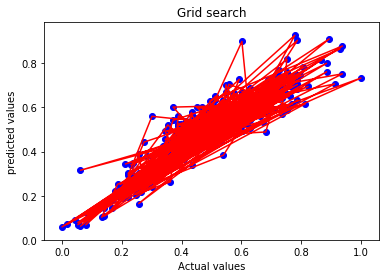

In [222]:
plt.scatter(x=y_test,y=pred_grid,color='b')
plt.plot(y_test,pred_grid,color='r')
plt.xlabel('Actual values')
plt.ylabel('predicted values')
plt.title('Grid search')

Text(0.5, 1.0, 'Grid search')

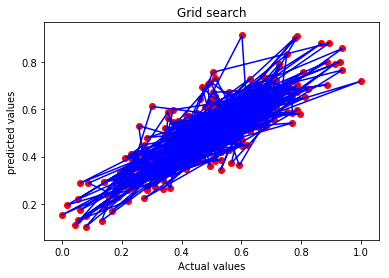

In [226]:
plt.scatter(x=y_test,y=pred_svr,color='r')
plt.plot(y_test,pred_svr,color='b')
plt.xlabel('Actual values')
plt.ylabel('predicted values')
plt.title('Grid search')

Here are the plots of two models :
    Random forest and svr 

In [227]:
import pickle

In [228]:
avacado = 'ava.pkl'
pickle.dump(random_cv,open(avacado,'wb'))